<a href="https://colab.research.google.com/github/HSYhrae/TIL/blob/master/Decision_Tree(salary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 결정 트리
- 관측값과 목표값을 연결해주는 예측모델로 나무 모양으로 데이터를 분류한다.
- 많은 트리 기반 모델의 기본형이다.
- 선형 모델과 달리 각 변수의 특정 지점을 기준으로 데이터를 분류해가며 예측모델을 만든다.


### 문제정의
- 여러 독립변수들로 연봉 예측

### 라이브러리 및 데이터 불러오기

- skipinitialspace: read_csv의 매개변수로 각 데이터의 첫 자리에 있는 공란을 자동으로 제거한다.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
data = pd.read_csv(url, skipinitialspace = True)

### 데이터 확인

In [119]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


- 고유값 확인

In [120]:
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

- 변수설명
- 독립변수
    1. age: 연령
    2. workclass: 고용형태
    3. education: 학력
    4. education-num: 교육 연수
    5. marital-status: 혼인 상태
    6. occupation: 직업
    7. relationship: 가족 관계
    8. race: 인종
    9. sex: 성별
    10. capital-gain: 자산 증가
    11. capital-loss: 자산 감소
    12. hours-per-week: 주당 노동 시간
    13. native-country: 본국
- 종속변수
    + class: 연봉 구분

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [122]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [123]:
data.describe(include = 'all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### 데이터 전처리: 범주형 데이터

- 종속변수 class: 50K 이하를 0, 초과를 1로 변경

In [124]:
data['class'] = data['class'].map({'<=50K': 0, '>50K': 1})

- 각 변수들의 자료형 확인

In [125]:
for i in data.columns:
    print(i, data[i].dtype)

age int64
workclass object
education object
education-num int64
marital-status object
occupation object
relationship object
race object
sex object
capital-gain int64
capital-loss int64
hours-per-week int64
native-country object
class int64


- object인 것만 따로 추출

In [126]:
obj_lst = []
for i in data.columns:
    if data[i].dtype == 'object':
        obj_lst.append(i)

In [127]:
obj_lst

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [128]:
for i in obj_lst:
    print(i, data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


- 범주형 변수를 수치형으로 변환할 땐 더미 변수로 바꾸는 방법을 기본으로 생각하자
- 다만 더미 변수를 사용하면 변수의 갯수가 많아지므로 값의 종류가 너무 많다면 다른 방법도 고려해보자
- 여기서는 값의 종류가 10개미만이면 더미 변수로 바꾸어 사용하고, 10개 이상이면 다른 방법을 사용을 고려한다.

In [129]:
for i in obj_lst:
    if data[i].nunique() >= 10:
        print(i, data[i].nunique())

education 16
occupation 14
native-country 41


- education 변수 처리

In [130]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

- 숫자로 잘 분류되어 있는 것처럼 보임

In [131]:
data[['education', 'education-num']]

,education,education-num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
3,Some-college,10
4,Some-college,10
...,...,...
48837,Assoc-acdm,12
48838,HS-grad,9
48839,HS-grad,9
48840,HS-grad,9


In [132]:
np.sort(data['education-num'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

- education-num이 1일 때 education에서 하나만 값만을 가지는 지 확인

In [133]:
data['education-num']==1

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: education-num, Length: 48842, dtype: bool

In [134]:
data[data['education-num']==1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [135]:
data[data['education-num']==1]['education'].unique()

array(['Preschool'], dtype=object)

- 전체 확인
- education-num에 매칭되는 education값은 1인 것을 확인

In [136]:
for i in np.sort(data['education-num'].unique()):
    print(i, data[data['education-num']==i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


- 따라서 education-num 컬럼만으로도 충분하므로 education 컬럼 제거

In [137]:
data.drop('education', axis = 1, inplace = True)

- occupation 변수 처리
- 유사한 직업군끼리 잘 묶여있는 확인
- 값의 수가 14로 엄청 많지는 않아 그냥 더미로 변환하여 사용

In [138]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

- native-country 변수 처리

- United-States가 거의 전체의 90%를 차지
- 이때 가장 쉬운 방법은 United-States인 것과 아닌것으로 구분, 데이터가 간소화되지만 그만큼 데이터가 소실됨
- United-States가 아닌 국가간에 큰 차이가 없다면 사용 가능
- 다른 방법: 비슷한 값들끼리 묶기, 예를 들면 지역별로 아시아, 북미, 남미 등


In [139]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

- 우선, 국가별 class 평균이 필요하므로 groupby() 함수로 확인

In [140]:
data.groupby('native-country').mean()

<ipython-input-140-e598d2d7f48e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('native-country').mean()


,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Cambodia,36.892857,9.392857,697.464286,194.821429,42.035714,0.321429
Canada,44.049451,10.692308,1233.505495,131.159341,40.406593,0.346154
China,41.852459,11.262295,1407.737705,170.655738,38.262295,0.295082
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Cuba,46.355072,9.391304,470.543478,62.717391,40.101449,0.246377
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Ecuador,37.666667,9.244444,328.288889,0.000000,39.266667,0.133333
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
England,40.527559,11.110236,1076.551181,108.913386,41.937008,0.370079


- class기준으로 정렬

In [141]:
data.groupby('native-country').mean().sort_values('class')

<ipython-input-141-b4780393cde9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('native-country').mean().sort_values('class')


,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


- United-States이외의 나라들이 뚜렷한 공통점을 가지지 않아 Others로 묶는 방법은 X
-  지역별로 묶는 방법도 지역별로 큰 공통점이 없음 ex) Portual과 France가 큰 차이를 보이고 Cuba와 Dominicam Republic도 큰 차이를 보인다. -> 이 방법도 X
- 그럼 그냥 숫자로 치환? -> 좋지 않지만 결정트리 방식에서는 트리가 충분히 깊다면 허용됨
- 치환 숫자 결정:
    1. 단순 숫자
    2. value_counts로 나온 숫자 -> 동률이 있을 수 있어 부적합
    3. class의 평균값 -> 오버피팅(과적합)문제가 있을 수 있지만 일단 사용

In [142]:
country_group = data.groupby('native-country').mean()['class']

<ipython-input-142-90e0194e54bb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_group = data.groupby('native-country').mean()['class']


In [143]:
country_group

native-country
Cambodia                      0.321429
Canada                        0.346154
China                         0.295082
Columbia                      0.047059
Cuba                          0.246377
Dominican-Republic            0.048544
Ecuador                       0.133333
El-Salvador                   0.070968
England                       0.370079
France                        0.421053
Germany                       0.281553
Greece                        0.367347
Guatemala                     0.034091
Haiti                         0.120000
Holand-Netherlands            0.000000
Honduras                      0.100000
Hong                          0.266667
Hungary                       0.315789
India                         0.410596
Iran                          0.372881
Ireland                       0.297297
Italy                         0.323810
Jamaica                       0.141509
Japan                         0.347826
Laos                          0.086957
Mexico    

In [144]:
country_group = country_group.reset_index()

In [145]:
country_group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [146]:
data = data.merge(country_group, on = 'native-country', how = 'left')

In [147]:
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


- 기존에 data에 class 변수가 있었고, country_group에도 class 변수가 있어 class_x, class_y 형태로 자동 변환됨
- native-country를 삭제하고, class_y를 native-country로 바꾸고 class_x를 class로 다시 변경

In [148]:
data.drop('native-country', axis = 1, inplace = True)
data = data.rename(columns = {'class_y': 'native-country', 'class_x': 'class'})

In [149]:
data.head(1)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977


### 데이터 전처리: 결측치 처리 및 더미 변수 변환

- 결측치 확인

In [150]:
data.isna().mean()

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.017546
dtype: float64

- native-country는 원래는 범주형 변수이라 평균이나 중위수로 채우기 불가능하지만 지금 class의 평균값이므로 가능
- 다른 방법: 완전히 별개의 값을 대입 ex) -9, -99, 이 방법은 트리 기반 모델에서는 괜찮지만 선형 모델에서는 왜곡을 일으킬 수 있다.
- -99로 결측치 대체하기

In [151]:
data['native-country'] = data['native-country'].fillna(-99)

- workclass, occupation 변수는 범주형 변수이므로 평균으로 대체 불가
- 특정 텍스트로 채우거나 dropna()로 결측치가 있는 행 삭제
- value_counts() 출력 결과를 보고 판단

In [152]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

- Private의 빈도가 약 70%로 조금 아쉽지만 해당 값으로 결측치 대체

In [153]:
data['workclass'] = data['workclass'].fillna('Private')

- occupation 확인

In [154]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

- 특정값이 압도적으로 많다고 할 수 없어 Unknown으로 대체

In [155]:
data['occupation'] = data['occupation'].fillna('Unknown')

- 모든 결측치를 해결
- 범주형 데이터를 더미 변수로 변환

In [156]:
data = pd.get_dummies(data, drop_first = True)

In [157]:
data

,age,education-num,capital-gain,capital-loss,hours-per-week,class,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,7,0,0,40,0,0.243977,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,38,9,0,0,50,0,0.243977,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,28,12,0,0,40,1,0.243977,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,10,7688,0,40,1,0.243977,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,18,10,0,0,30,0,0.243977,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0.243977,0,0,1,...,0,0,0,0,1,0,0,0,1,0
48838,40,9,0,0,40,1,0.243977,0,0,1,...,0,0,0,0,0,0,0,0,1,1
48839,58,9,0,0,40,0,0.243977,0,0,1,...,0,0,0,1,0,0,0,0,1,0
48840,22,9,0,0,20,0,0.243977,0,0,1,...,0,0,1,0,0,0,0,0,1,1


### 모델링 및 평가하기

- 훈련셋/시험셋으로 나누기

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size = 0.4, random_state = 100)

- 모델링 및 예측


In [162]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [164]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8137892204534984

### 더 알아보기

- 결정 트리는 특정 변수에 대한 특정 기준값으로 데이터를 계속 분류해가면서 유사한 그룹으로 묶어내어 예측값을 만드는 알고리즘이다.
- 분류 모델의 기준: 지니 지수와 교차 엔트로피 -> 순도가 높을수록 지니 및 엔트로피 값은 낮아진다.
- 차이점: 지니지수는 0\~5 사이의 값을 가진다. 교차 엔트로피는 0~1 사이의 값을 가진다.

- 회귀 모델의 평가 기준: MSE
- 가장 낮은 MSE값이 나오도록 노드를 분류한다.

### 오버피팅(과적합) 문제
- 트리 모델의 마지막 노드에 값이 하나씩만 들어갈 수 있는 모델 -> 좋은 모델 X 왜? 시험셋에 대한 예측은 오히려 떨어지므로
- 모든 머신러닝 모델에서 발생하는 문제이다. 두루뭉실하게 예측하는 모델 즉, 일반화할 수 있는 모델이 좋은 모델이다.
- 높은 편향은 언더피팅 문제를 높은 분산은 오버피팅 문제를 일으킨다.

### 매개변수 튜닝(하이퍼 파라미터 튜닝)

- 결정 트리에서는 트리 깊이가 깊어질수록 오버피팅 발생 가능성이 높다.
- 이를 방지하기 위해 트리의 깊이를 제한 할 수 있는 매개변수가 있다.
- 기본값은 None이어서 별도로 매개변수를 지정하지 않으면 최대 깊이로 트리를 만든다.
- 우선 기본값으로 모델링

In [166]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Train score:', accuracy_score(y_train, train_pred), 'Teat score:', accuracy_score(y_test, test_pred))

Train score: 0.9780242279474493 Teat score: 0.8154783231816554


- 트리 깊이를 5로 지정

In [167]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Train score:', accuracy_score(y_train, train_pred), 'Teat score:', accuracy_score(y_test, test_pred))

Train score: 0.8540180856509129 Teat score: 0.8499769667809797


- 트리 깊이를 7로 지정
- 5와 비슷하지만 전반적으로 조금 더 정확해졌다.
- max_depth외에도 다른 매개변수를 활용하여 성능을 더 개선할 수 있다.

In [168]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Train score:', accuracy_score(y_train, train_pred), 'Teat score:', accuracy_score(y_test, test_pred))

Train score: 0.8598532673605187 Teat score: 0.8541229462046374


### 트리 그래프

- 사이킷런의 tree에서 그래프 시각화하기
- 7로 되어 있어 너무 거대한 트리여서 내용을 확인할 수 없음

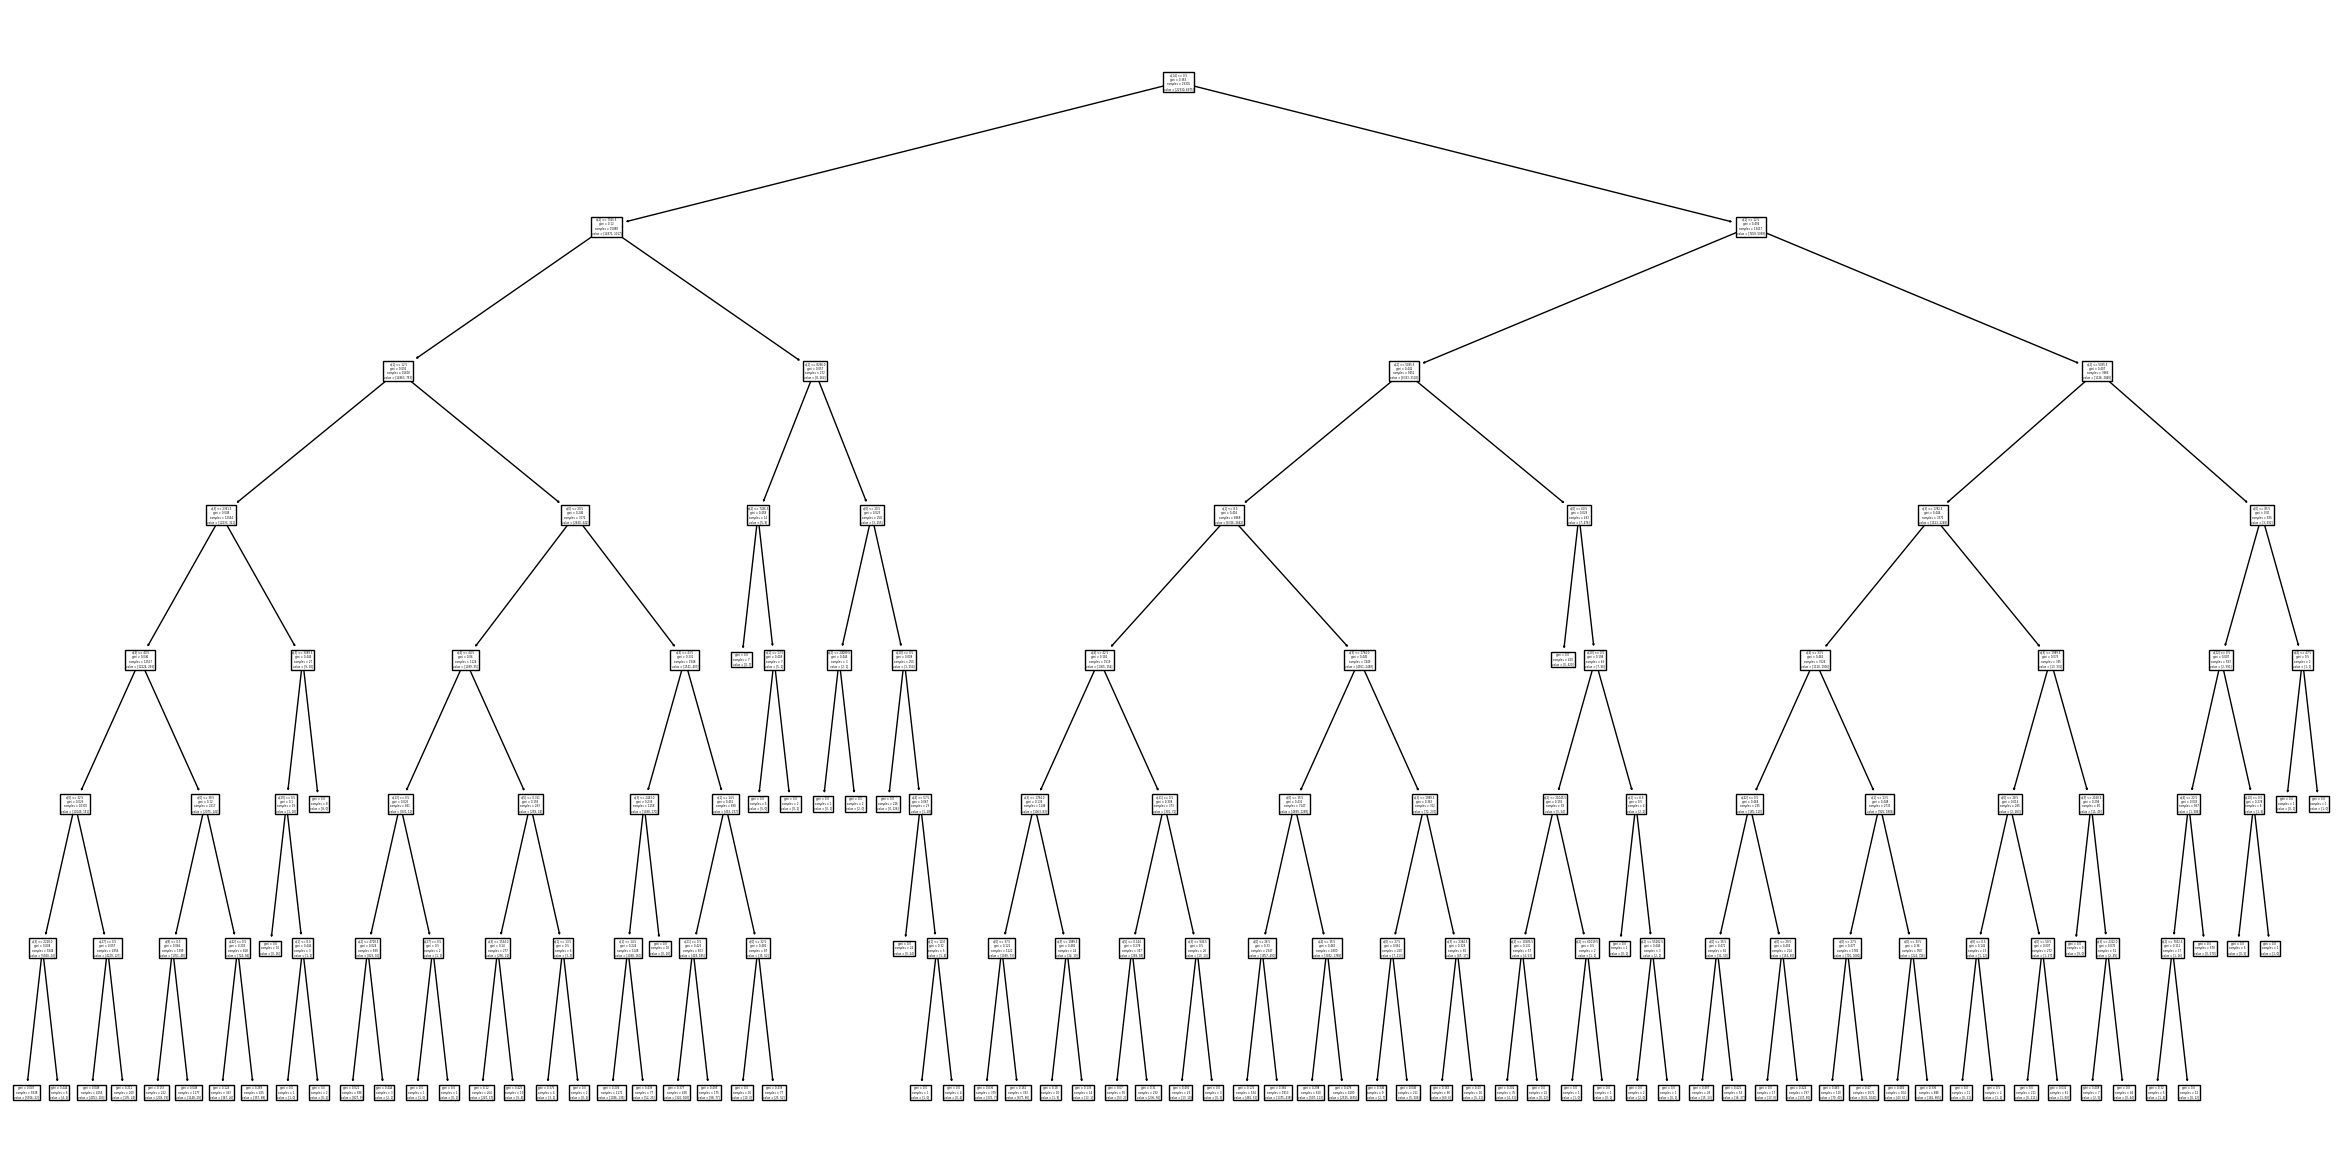

In [170]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30, 15))
plot_tree(model)
plt.show()

- 3으로 변경

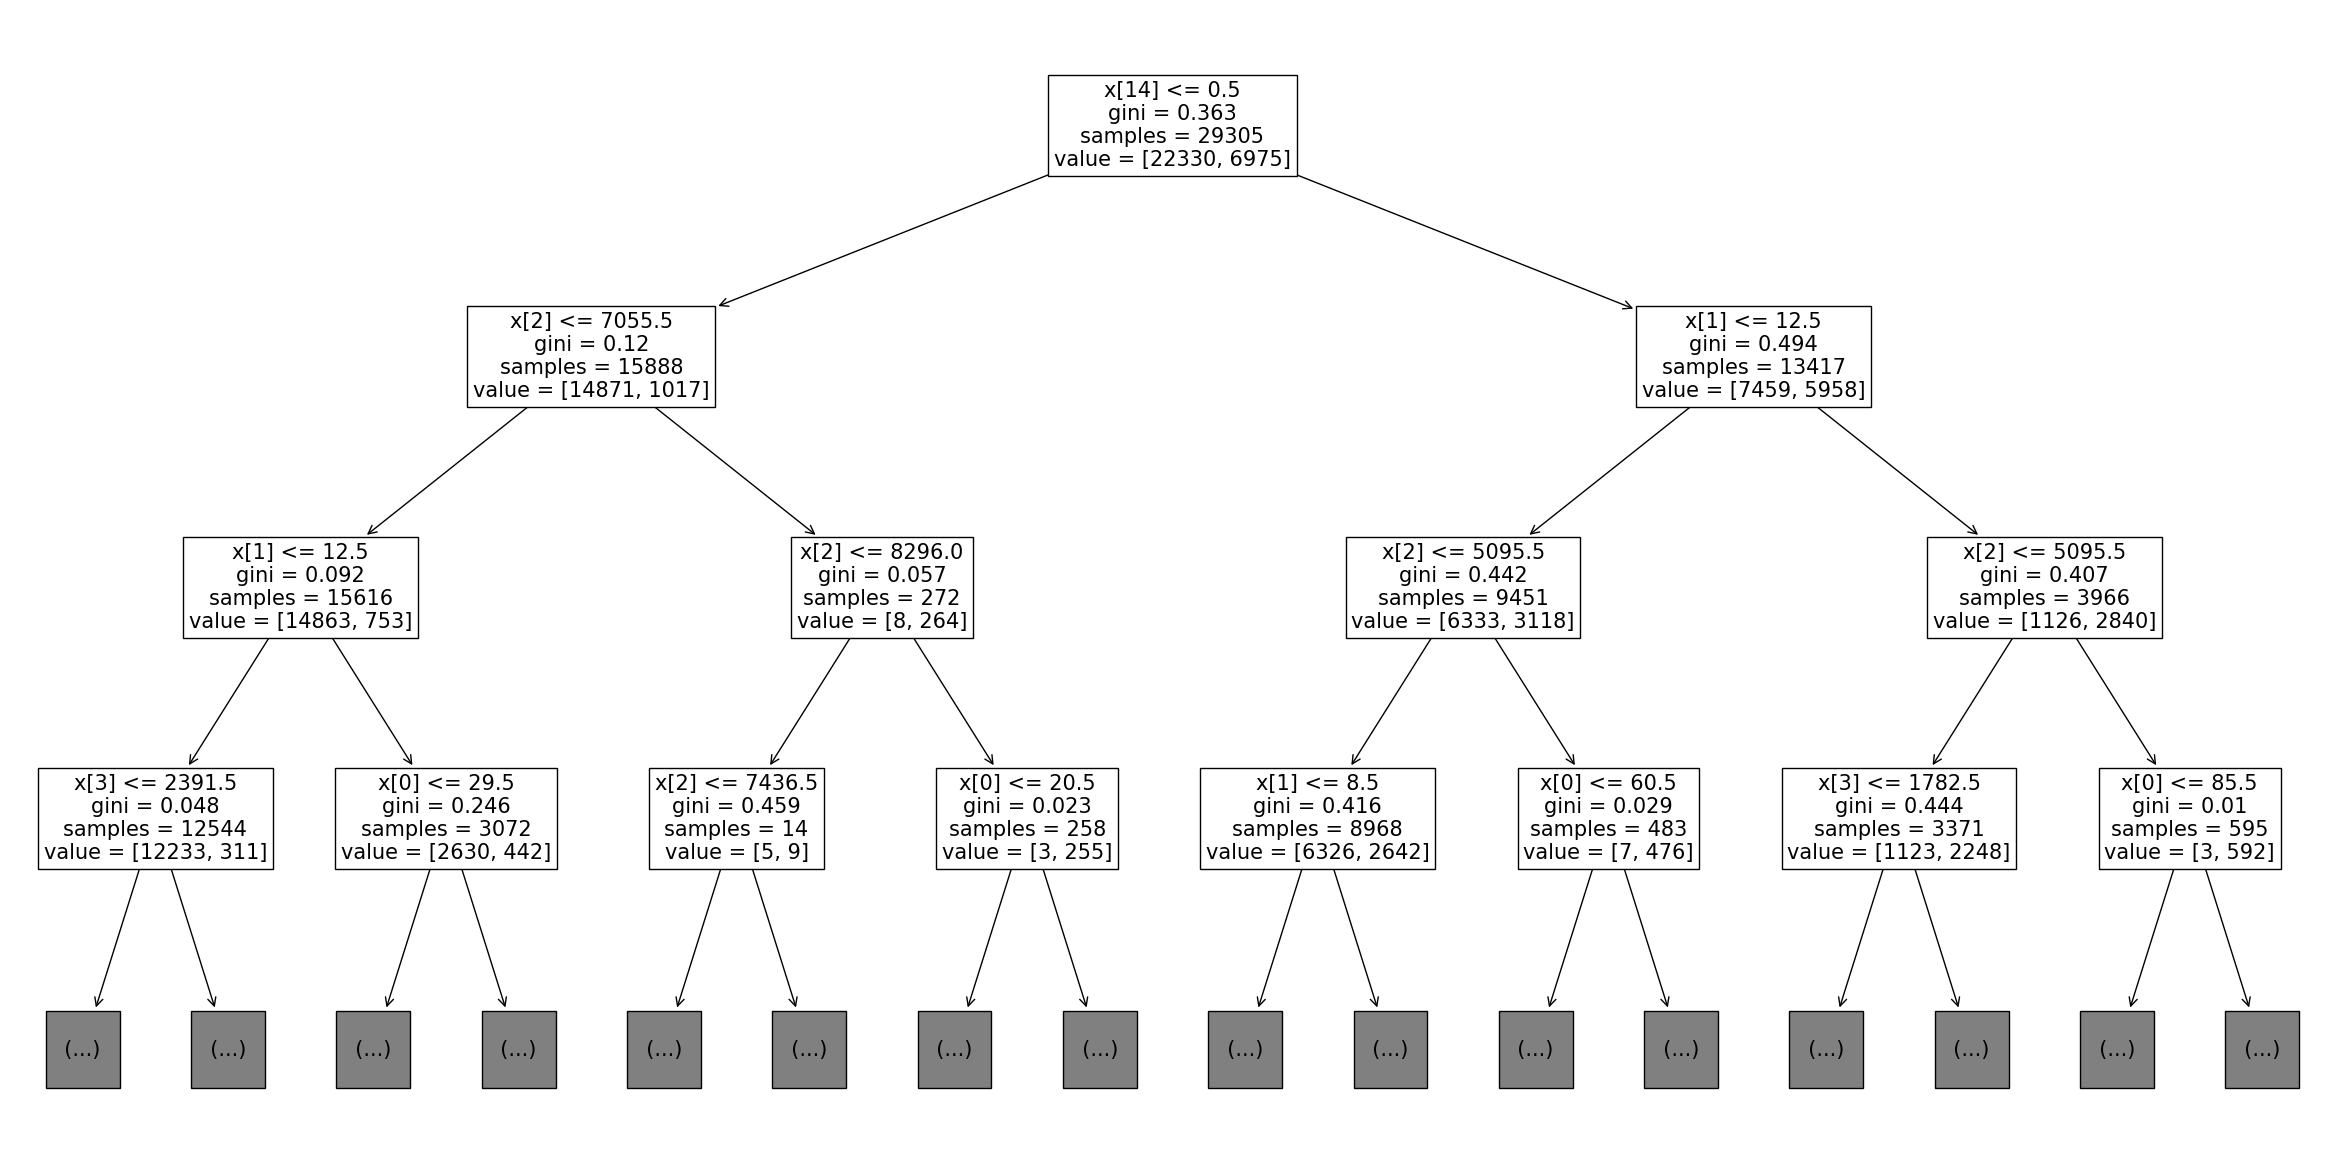

In [172]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30, 15))
plot_tree(model, max_depth = 3, fontsize = 15)
plt.show()

- 변수명을 추가

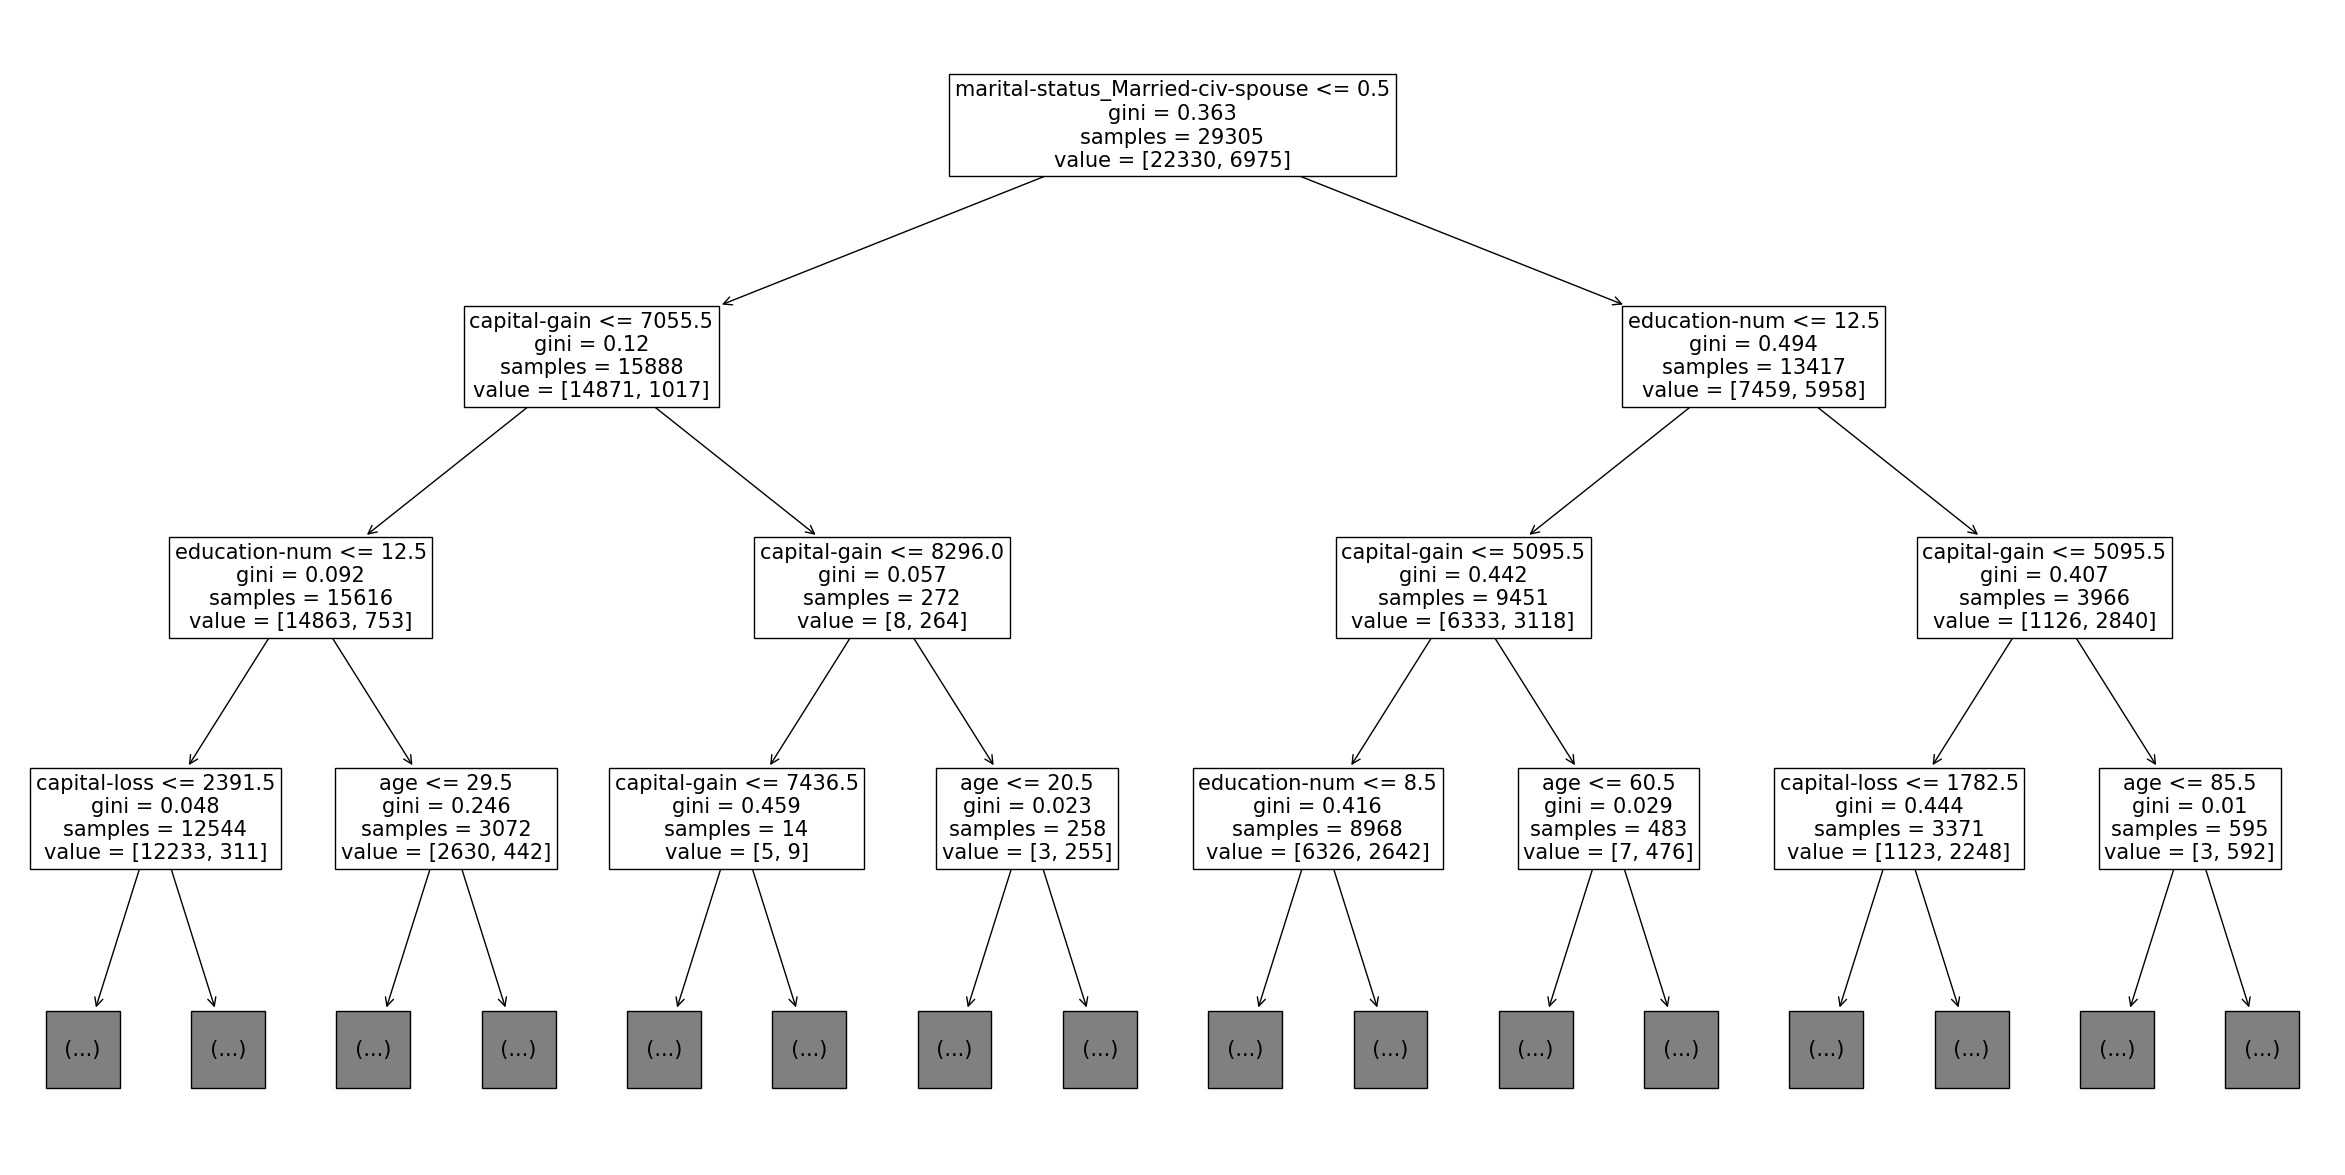

In [173]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30, 15))
plot_tree(model, max_depth = 3, fontsize = 15, feature_names = X_train.columns)
plt.show()